In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")

### Creating Dataframe object

In [2]:
titanic_data=pd.read_csv('titanic_train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking the missing values:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling the missing values:

In [7]:
# drop the Cabin value:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [8]:
# Replacing the missing values in Age column with mean value:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [9]:
# Finding the mode value if 'Embarked' column
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [10]:
# Replaceing the missing value with Embarked:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [11]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Null values

In [12]:
# Rechecking the missing values:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
titanic_data.shape

(891, 11)

In [14]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

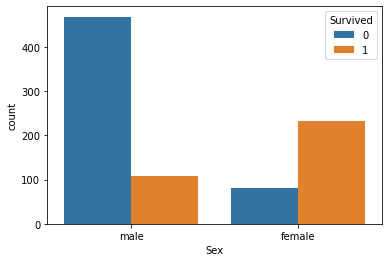

In [15]:
# display of Survived with gender
sns.countplot('Sex',hue='Survived',data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

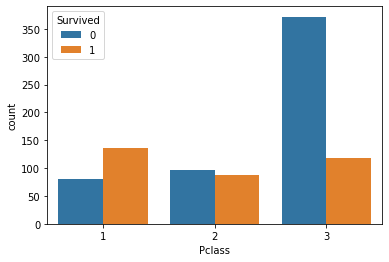

In [16]:
sns.countplot('Pclass',hue='Survived',data=titanic_data)

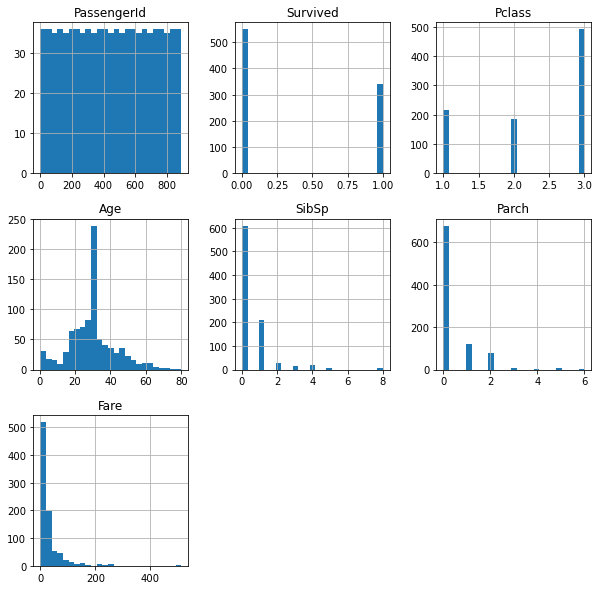

In [17]:
# display histogram
titanic_data.hist(bins=25,figsize=(10,10))
plt.show()

In [18]:
# Convert data into calegorical data:
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [19]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


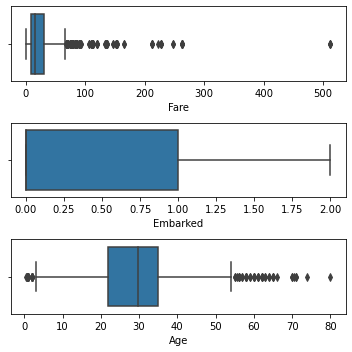

In [20]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(titanic_data['Fare'], ax = axs[0])
plt2 = sns.boxplot(titanic_data['Embarked'], ax = axs[1])
plt3 = sns.boxplot(titanic_data['Age'], ax = axs[2])
plt.tight_layout()

### Data Correlation

<AxesSubplot:>

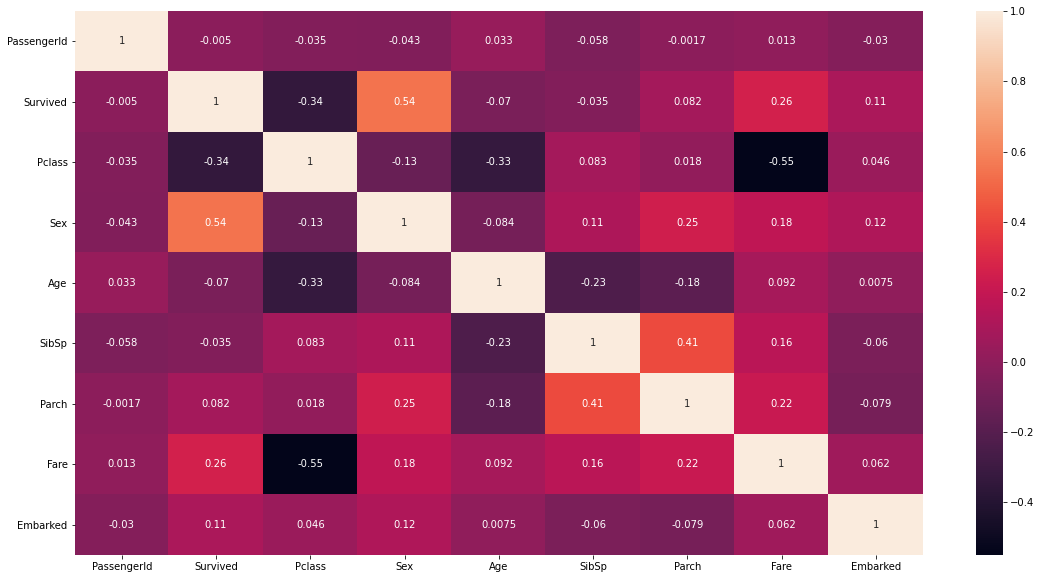

In [21]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='white')
sns.heatmap(titanic_data.corr(),annot=True)

In [22]:
#split feature and Target data
X=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=titanic_data['Survived']

In [23]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


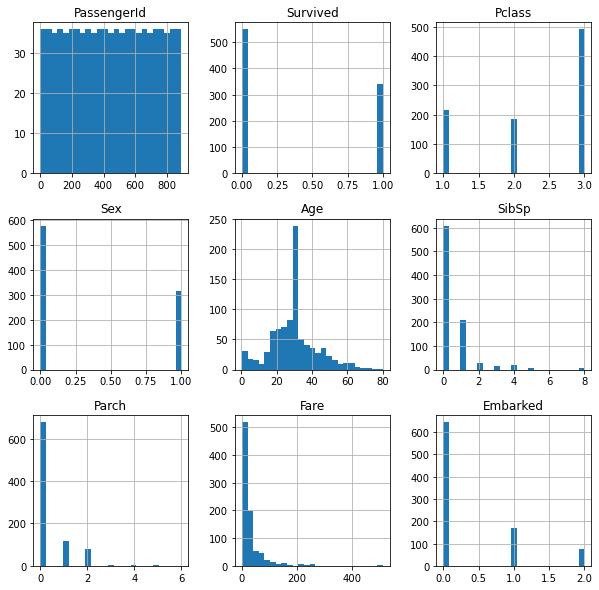

In [24]:
# display histogram
titanic_data.hist(bins=25,figsize=(10,10))
plt.show()

In [25]:
pd.pivot_table(titanic_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.415100,22.117887,0.329690,0.553734
1,28.549778,48.395408,0.464912,0.473684


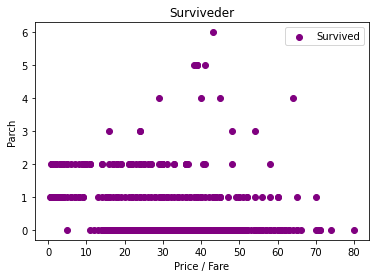

In [26]:
#Plot the Surviveder 
plt.scatter(titanic_data['Age'], titanic_data['Parch'],  color = 'purple', label='Survived')
plt.ylabel('Parch')
plt.xlabel('Price / Fare')
plt.title('Surviveder')
plt.legend()
plt.show()

### Split datasets into train and test

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


### Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(X_train)
scal_X_train = norm_fit.transform(X_train)
scal_X_test = norm_fit.transform(X_test)
print(scal_X_train)

[[0.         0.         0.56078209 ... 0.         0.0541074  0.5       ]
 [1.         1.         0.05072258 ... 0.16666667 0.03259623 0.        ]
 [1.         0.         0.65996033 ... 0.         0.01756683 0.        ]
 ...
 [0.         0.         1.         ... 0.         0.09662576 0.5       ]
 [0.         0.         0.4148359  ... 0.         0.43288417 0.        ]
 [0.         0.         0.4148359  ... 0.         0.05060223 0.        ]]


### Creating the hyperparameter grid


In [30]:
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()

# Instantiating the GridSearchCV 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(X, Y)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.7934969556211161


## Create Model

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [32]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression method:
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method :
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector method:
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM medthod:
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method:
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier method:
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method:
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
    print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [33]:
model = models(X_train,Y_train)

Logistic Regression Training Accuracy: 0.8075842696629213
K Nearest Neighbor Training Accuracy: 0.8061797752808989
Support Vector Machine (Linear Classifier) Training Accuracy: 0.800561797752809
Support Vector Machine (RBF Classifier) Training Accuracy: 0.6797752808988764
Gaussian Naive Bayes Training Accuracy: 0.7935393258426966
Decision Tree Classifier Training Accuracy: 0.9859550561797753
Random Forest Classifier Training Accuracy: 0.9747191011235955


### Model Evaluation:

In [34]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
#extracting TN, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
print(cm)
print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
print()

[[90 10]
 [29 50]]
Model[6] Testing Accuracy = "0.7821229050279329 !"



In [35]:
#Get the DATAFrame model:
forest = model[6]
importances = pd.DataFrame({'feature':titanic_data.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
SibSp,0.295
Name,0.278
Pclass,0.215
Survived,0.074
Sex,0.051
Age,0.048
Parch,0.039


In [36]:
# Save the model:
import pickle
filename = 'importances'
pickle.dump(model, open(filename, 'wb'))